# Recommender System based on Food.com Recipes Dataset

We will be using the recipes dataset from food.com that contains user reviews and metadata for each and every recipe available.\
By utilising the scikit surprise library for the collaborative filtering and by using tf-idf count vectorizer and a cosine similarity matrix we will be implementing the content based filtering.\
Also, keras embeddings is used for the collaborative filtering as a second method.

## First, let's import the data

The full dataset is comprised of 522,517 recipes and 1,401,982 reviews from 271,907 different users.

In [1]:
import pandas as pd

recipes = '../Datasets/recipes.csv'
reviews = '../Datasets/reviews.csv'

recipes_df = pd.read_csv(recipes)
reviews_df = pd.read_csv(reviews)

### Understanding and exploring the data

### <u>Recipes Dataset</u>

In [2]:
recipes_df.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [3]:
recipes_df.columns

Index(['RecipeId', 'Name', 'AuthorId', 'AuthorName', 'CookTime', 'PrepTime',
       'TotalTime', 'DatePublished', 'Description', 'Images', 'RecipeCategory',
       'Keywords', 'RecipeIngredientQuantities', 'RecipeIngredientParts',
       'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent',
       'SaturatedFatContent', 'CholesterolContent', 'SodiumContent',
       'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
       'RecipeServings', 'RecipeYield', 'RecipeInstructions'],
      dtype='object')

In [4]:
recipes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

### Features:
**RecipeId:** The id of the recipe.\
**Name:** The name of the recipe. \
**AuthorId:** The id of the author. \
**AuthorName:** The name of the author. \
**CookTime:** Time it takes for the food to cook. \
**PrepTime:** Time it takes to prepare the recipe. \
**TotalTime:** Combined time of both. \
**DatePublished:** Date of publication of the recipe. \
**Description:** Description of recipe. \
**Images:** Image of the recipe. \
**RecipeCategory:** Category of the recipe. \
**Keywords:** Tags/Keywords related to type of recipe. \
**RecipeIngredientQuantities:** Quantities of each ingredient. \
**RecipeIngredientParts:** Ingredients. \
**AggregatedRating:** The rating of the recipe. \
**ReviewCount:** Amount of reviews. \
**Calories:** Calories of recipe. \
**FatContent:** Fat content of recipe. \
**SaturatedFatContent:** Saturated fat content of recipe. \
**CholesterolContent:** Cholesterol content of recipe. \
**SodiumContent:** Sodium content of recipe. \
**CarbohydrateContent:** Carbuhydrates content of recipe. \
**FiberContent:** Fiber content of recipe. \
**SugarContent:** Sugar content of recipe. \
**ProteinContent:** Protein content of recipe. \
**RecipeServings:** Servings of recipe. \
**RecipeYield:** Yield of recipe. \
**RecipeInstructions:** Instructions of recipe.

### <u>Reviews Dataset</u>

In [5]:
reviews_df.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
0,2,992,2008,gayg msft,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z,2000-01-25T21:44:00Z
1,7,4384,1634,Bill Hilbrich,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z,2001-10-17T16:49:59Z
2,9,4523,2046,Gay Gilmore ckpt,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z,2000-02-25T09:00:00Z
3,13,7435,1773,Malarkey Test,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z,2000-03-13T21:15:00Z
4,14,44,2085,Tony Small,5,An excellent dish.,2000-03-28T12:51:00Z,2000-03-28T12:51:00Z


In [6]:
reviews_df.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'AuthorName', 'Rating', 'Review',
       'DateSubmitted', 'DateModified'],
      dtype='object')

In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   AuthorName     1401982 non-null  object
 4   Rating         1401982 non-null  int64 
 5   Review         1401768 non-null  object
 6   DateSubmitted  1401982 non-null  object
 7   DateModified   1401982 non-null  object
dtypes: int64(4), object(4)
memory usage: 85.6+ MB


### Features:
**ReviewId:** The id of the review.\
**RecipeId:** The id of the recipe. \
**AuthorId:** The id of the author. \
**AuthorName:** The name of the author. \
**Rating:** The rating submitted by the user. \
**Review:** The written review submitted by the user. \
**DateSubmitted:** The date that the review was submitted. \
**DateModified:** The date that the review was modified.

## Exploring the datasets

### We will be representing the most prominent recipe names with wordcloud representation

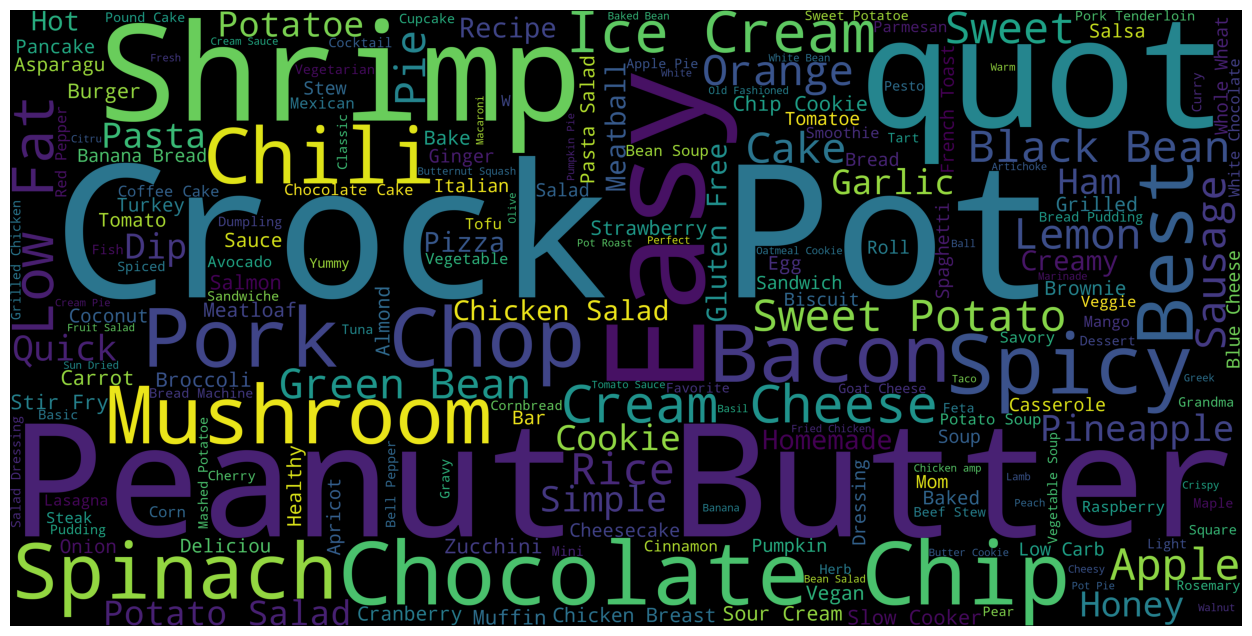

In [8]:
# Import new libraries
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

# Create a wordcloud of the movie titles
recipes_df['Name'] = recipes_df['Name'].fillna("").astype('str')
title_corpus = ' '.join(recipes_df['Name'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### Exploring the most common recipe categories

In [11]:
# Make a census of the genre keywords
from collections import Counter

# Assuming 'recipes' is your DataFrame
# Make sure to replace it with the actual name of your DataFrame

# Combine all RecipeCategory values into a single string and split by '|'
all_categories = '|'.join(recipes_df['RecipeCategory'].dropna()).split('|')

# Use Counter to count the occurrences of each category
category_counter = Counter(all_categories)

# Get the most common categories and their frequencies
most_common_categories = category_counter.most_common(10)

# Display the result
most_common_categories[:10]

[('Dessert', 62072),
 ('Lunch/Snacks', 32586),
 ('One Dish Meal', 31345),
 ('Vegetable', 27231),
 ('Breakfast', 21101),
 ('Beverages', 16076),
 ('Chicken', 13249),
 ('Meat', 13131),
 ('Breads', 12804),
 ('Pork', 12603)]

### ...and then displaying them in a wordcloud

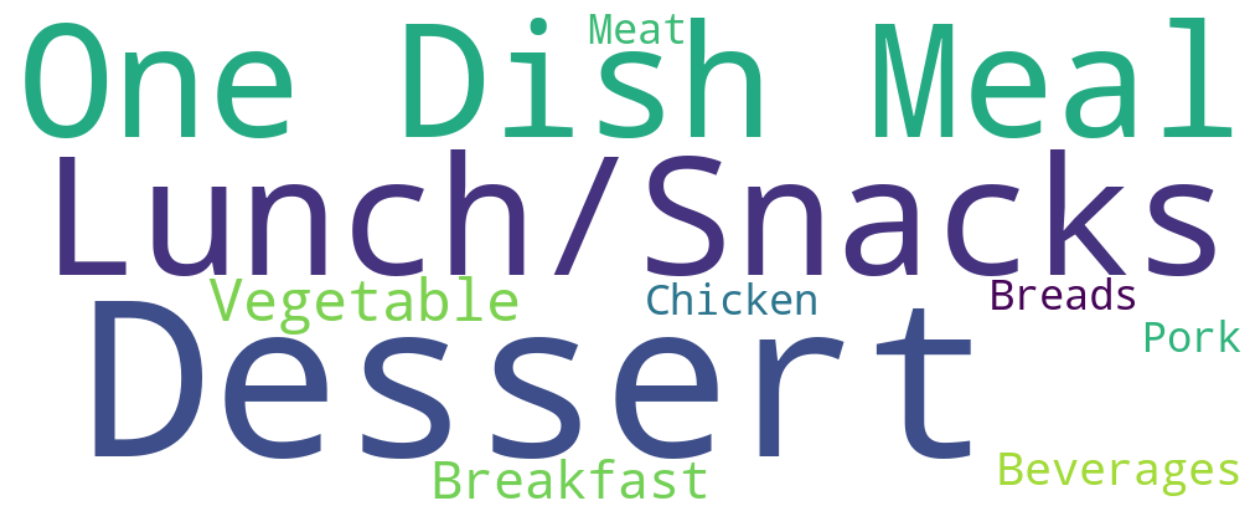

In [12]:
# Define the dictionary used to produce the genre wordcloud
genres = dict()
trunc_occurences = most_common_categories[0:10]
for s in trunc_occurences:
    genres[s[0]] = s[1]

# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Implementation

#### Importing our libraries

In [13]:
import pandas as pd
from sklearn.metrics import make_scorer
from surprise import Dataset, Reader, KNNBasic, accuracy
from surprise.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [14]:
# Sampling a fraction of our dataset
sample_fraction = 0.01
recipes_df_sample = recipes_df.sample(frac=sample_fraction, random_state=42)
reviews_df_sample = reviews_df.sample(frac=sample_fraction, random_state=42)

# Collaborative Filtering using Surprise library
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(reviews_df_sample[['AuthorId', 'RecipeId', 'Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

collab_algo = KNNBasic()
collab_algo.fit(trainset)

# Content-Based Filtering with scikit-learn
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
recipe_tfidf_matrix = tfidf_vectorizer.fit_transform(recipes_df_sample['RecipeCategory'].fillna(''))

Computing the msd similarity matrix...
Done computing similarity matrix.


In [15]:
# Hybrid Recommender System
def hybrid_recommendation(user_id, recipe_id, n=10):
    # Collaborative Filtering
    collab_top_n = get_collab_top_n(user_id, n)

    # Content-Based Filtering
    content_top_n = get_content_top_n(recipe_id, n)

    # Combine recommendations from collaborative and content-based filtering
    hybrid_recommendations = list(set(collab_top_n) | set(content_top_n))
    return hybrid_recommendations[:n]

# Function to get top N recommendations based on collaborative filtering
def get_collab_top_n(user_id, n=10):
    user_recipes = recipes_df_sample[recipes_df_sample['AuthorId'] == user_id]['RecipeId'].values
    collab_predictions = [collab_algo.predict(user_id, recipe_id).est for recipe_id in user_recipes]
    top_n_indices = sorted(range(len(collab_predictions)), key=lambda i: collab_predictions[i], reverse=True)[:n]
    return user_recipes[top_n_indices]

# Function to get top N recommendations based on content-based filtering
def get_content_top_n(recipe_id, n=10):
    # Build a 1-dimensional array with recipe names
    names = recipes_df_sample['Name']
    indices = pd.Series(recipes_df_sample.index, index=recipes_df_sample['RecipeId'])
    
    idx = indices[recipe_id]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    recipe_indices = [i[0] for i in sim_scores]
    return names.iloc[recipe_indices]

## Evaluation of our models
### We evaluate our Collaborative filtering model using the built-in tool that scikit-surprise provides us.

In [16]:
cross_validate(collab_algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2810  1.2151  1.2135  1.2699  1.2473  1.2454  0.0276  
MAE (testset)     0.8527  0.8232  0.8223  0.8469  0.8366  0.8364  0.0123  
Fit time          0.40    0.39    0.33    0.38    0.36    0.37    0.03    
Test time         0.02    0.02    0.02    0.02    0.02    0.02    0.00    


{'test_rmse': array([1.28102085, 1.21508407, 1.21349648, 1.26991481, 1.24734205]),
 'test_mae': array([0.85274024, 0.8231646 , 0.822334  , 0.84693471, 0.83661282]),
 'fit_time': (0.40407824516296387,
  0.3914039134979248,
  0.32630133628845215,
  0.3800048828125,
  0.3643350601196289),
 'test_time': (0.01990985870361328,
  0.016826868057250977,
  0.016999483108520508,
  0.021787405014038086,
  0.018770933151245117)}

## For our content based filtering model:
The evaluation needs to be done manually. We will choose a few recipes and judge whether the recommendations based on these make sense in order to evaluate the model.

In [17]:
import pandas as pd
import random
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Reset index of the sampled DataFrame
recipes_df_sample.reset_index(drop=True, inplace=True)

# Content-Based Filtering with scikit-learn
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
recipe_tfidf_matrix = tfidf_vectorizer.fit_transform(recipes_df_sample['RecipeCategory'].fillna(''))

from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(recipe_tfidf_matrix, recipe_tfidf_matrix)

# Print 10 random recipes along with their RecipeId
random_recipes = recipes_df_sample.sample(10)[['RecipeId', 'Name']]
print("Random Recipes:")
print(random_recipes)

# Ask the user to input their desired RecipeId
given_recipe_id = int(input("\nEnter a Recipe ID to get recommendations: "))

# Get recommendations based on user input
recommended_recipes = get_content_top_n(given_recipe_id)
print(f"\nRecommendations based on Recipe {given_recipe_id}'s category:\n", recommended_recipes)

Random Recipes:
      RecipeId                                               Name
474     511488  Chicken Panini With Gouda, Red Onion and Honey...
1930    101797              Uncle Bill's Seville Orange Marmalade
3059    519230                               Pumpkin Snap Cookies
525     489750                  Hamburger Stroganoff (Paula Deen)
402     337400                          Old Fashioned Raisin Bars
4803    376754  Yes! This is a Potatoes,  Eggs, Leeks &amp; Ch...
2074    501687                                   Multigrain Bread
4482    252668                                       Italian Wrap
2970    267252                        Chocolate Bourbon Pecan Pie
142     331659                                         Beer Bread

Enter a Recipe ID to get recommendations: 267252

Recommendations based on Recipe 267252's category:
 163                                 Morton's Key Lime Pie
207                           Simple Diabetic Pumpkin Pie
269                   Yummy Vanilla Pie

## Recommendation system using Neural Networks

Recipe recommendation using Keras embeddings

In [18]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

#### reviews_df_sample -> ReviewId, RecipeId, AuthorId, AuthorName, Rating, Review, DateSubmitted, DateModified

In [20]:
reviews_df_sample['AuthorId'] = reviews_df_sample['AuthorId'].astype('category')
reviews_df_sample['RecipeId'] = reviews_df_sample['RecipeId'].astype('category')

user_ids = reviews_df_sample['AuthorId'].cat.codes.values
recipe_ids = reviews_df_sample['RecipeId'].cat.codes.values

# Split the dataset
X = np.stack([user_ids, recipe_ids], axis=1)
y = reviews_df_sample['Rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model parameters
n_users = reviews_df_sample['AuthorId'].nunique()
n_movies = reviews_df_sample['RecipeId'].nunique()
n_factors = 50

# Building the model
user_input = Input(shape=(1,), name='user_input')
recipe_input = Input(shape=(1,), name='recipe_input')
user_embedding = Embedding(output_dim=n_factors, input_dim=n_users, input_length=1, name='user_embedding')(user_input)
recipe_embedding = Embedding(output_dim=n_factors, input_dim=n_movies, input_length=1, name='recipe_embedding')(recipe_input)
user_vector = Flatten(name='flatten_users')(user_embedding)
recipe_vector = Flatten(name='flatten_recipes')(recipe_embedding)
y = Dot(axes=1, name='dot_product')([user_vector, recipe_vector])
model = Model(inputs=[user_input, recipe_input], outputs=y)
model.compile(optimizer=Adam(0.001), loss='mean_squared_error')

# Train the model
model.fit([X_train[:, 0], X_train[:, 1]], y_train, epochs=10, validation_data=([X_test[:, 0], X_test[:, 1]], y_test))

# Model summary
model.summary()

Epoch 1/10
351/351 [==============================] - 4s 9ms/step - loss: 21.0475 - val_loss: 21.1144
Epoch 2/10
351/351 [==============================] - 3s 8ms/step - loss: 20.7735 - val_loss: 21.1154
Epoch 3/10
351/351 [==============================] - 3s 10ms/step - loss: 20.1475 - val_loss: 21.1165
Epoch 4/10
351/351 [==============================] - 3s 9ms/step - loss: 18.8651 - val_loss: 21.1172
Epoch 5/10
351/351 [==============================] - 3s 8ms/step - loss: 16.8482 - val_loss: 21.1177
Epoch 6/10
351/351 [==============================] - 3s 8ms/step - loss: 14.3275 - val_loss: 21.1189
Epoch 7/10
351/351 [==============================] - 3s 9ms/step - loss: 11.6723 - val_loss: 21.1196
Epoch 8/10
351/351 [==============================] - 3s 9ms/step - loss: 9.1895 - val_loss: 21.1229
Epoch 9/10
351/351 [==============================] - 3s 8ms/step - loss: 7.0333 - val_loss: 21.1264
Epoch 10/10
351/351 [==============================] - 3s 8ms/step - loss: 5.2391 -

In [21]:
reviews_df_sample.head()

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
1102405,1262092,464817,560491,AZPARZYCH,5,This IS quick and easy and so good too! Made ...,2011-10-30T03:15:31Z,2011-10-30T03:15:31Z
1052635,1205441,424275,539686,CaliforniaJan,5,"Love the taste of this rice dish, which I made...",2011-03-29T00:17:44Z,2011-03-29T00:17:44Z
279108,298299,136011,76535,Jeffsmom,4,My crust never got near as brown as the crust ...,2006-07-31T13:00:37Z,2006-07-31T13:00:37Z
427192,459580,15828,382532,Sweet Diane,5,I had a hard time looking this recipe up. I h...,2007-08-07T13:24:21Z,2007-08-07T13:24:21Z
690146,759528,106723,290010,Scrivener1,5,"I am not a chai connoisseour, but I really enj...",2008-12-03T23:59:09Z,2008-12-03T23:59:09Z


**After training the model, make a prediction**

In [22]:
# Example: Predict the rating for a given user and movie
user_id_to_predict = 115523
recipe_id_to_predict = 15828

# Since our model expects input in the form of category codes,
# we need to convert these IDs to their corresponding codes
user_id_code = np.argwhere(reviews_df_sample['AuthorId'].cat.categories == user_id_to_predict)[0, 0]
recipe_id_code = np.argwhere(reviews_df_sample['RecipeId'].cat.categories == recipe_id_to_predict)[0, 0]

# Making the prediction and printing the predicted rating
predicted_rating = model.predict([np.array([user_id_code]), np.array([recipe_id_code])])
print(f"Predicted rating for user {user_id_to_predict} and recipe {recipe_id_to_predict}: {predicted_rating[0,0]}")

1/1 [==============================] - 0s 141ms/step
Predicted rating for user 115523 and recipe 15828: -0.038339778780937195


In [23]:
recipes_df_sample.loc[recipes_df_sample['RecipeId'] == recipe_id_to_predict]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions


In [24]:
reviews_df_sample.loc[reviews_df_sample['RecipeId'] == recipe_id_to_predict]

,ReviewId,RecipeId,AuthorId,AuthorName,Rating,Review,DateSubmitted,DateModified
427192,459580,15828,382532,Sweet Diane,5,I had a hard time looking this recipe up. I h...,2007-08-07T13:24:21Z,2007-08-07T13:24:21Z
294614,314716,15828,115523,jlnjz,5,"This was a HUGE hit with my family and, honest...",2006-09-21T14:03:27Z,2006-09-21T14:03:27Z
